In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
import pandas as pd
data = pd.read_csv(
    'https://raw.githubusercontent.com/Garve/datasets/4576d323bf2b66c906d5130d686245ad205505cf/mmm.csv',
    parse_dates=['Date'],
    index_col='Date'
)
X = data.drop(columns=['Sales'])
y = data['Sales']

In [3]:
lr = LinearRegression()
print(cross_val_score(lr, X, y, cv=TimeSeriesSplit()).mean())

0.716134134746767


In [4]:
lr.fit(X, y) # refit the model with the complete dataset
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)

Coefficients: [0.35968382 0.48833246 1.2159193 ]
Intercept: 6678.396933606162


In [5]:
print(lr.predict(([[11543.58, 4615.35, 2518.88]])))
# Output: [16147.01594158]

[16147.01594158]


In [8]:
data

,TV,Radio,Banners,Sales
Date,,,,
2018-01-07,13528.10,0.00,0.00,9779.80
2018-01-14,0.00,5349.65,2218.93,13245.19
2018-01-21,0.00,4235.86,2046.96,12022.66
2018-01-28,0.00,3562.21,0.00,8846.95
2018-02-04,0.00,0.00,2187.29,9797.07
...,...,...,...,...
2021-10-03,0.00,0.00,1691.68,9030.17
2021-10-10,11543.58,4615.35,2518.88,15904.11
2021-10-17,0.00,4556.16,1919.19,12839.29


In [9]:
weights = pd.Series(
    lr.coef_,
    index=X.columns
)

weights

TV         0.359684
Radio      0.488332
Banners    1.215919
dtype: float64

In [11]:
base = lr.intercept_
base

6678.396933606162

In [13]:
### unadjusted contribution
unadj_contributions = X.mul(weights).assign(Base=base)
unadj_contributions

,TV,Radio,Banners,Base
Date,,,,
2018-01-07,4865.838699,0.000000,0.000000,6678.396934
2018-01-14,0.000000,2612.407764,2698.039815,6678.396934
2018-01-21,0.000000,2068.507949,2488.938173,6678.396934
2018-01-28,0.000000,1739.542785,0.000000,6678.396934
2018-02-04,0.000000,0.000000,2659.568129,6678.396934
...,...,...,...,...
2021-10-03,0.000000,0.000000,2056.946364,6678.396934
2021-10-10,4152.038962,2253.825236,3062.754810,6678.396934
2021-10-17,0.000000,2224.920837,2333.580164,6678.396934


In [14]:
adj_contributions = (unadj_contributions
                     .div(unadj_contributions.sum(axis=1), axis=0)
                     .mul(y, axis=0)
                    ) # contains all contributions for each day
adj_contributions

,TV,Radio,Banners,Base
Date,,,,
2018-01-07,4122.137734,0.000000,0.000000,5657.662266
2018-01-14,0.000000,2886.169485,2980.775165,7378.245350
2018-01-21,0.000000,2213.360195,2663.232057,7146.067747
2018-01-28,0.000000,1828.196513,0.000000,7018.753487
2018-02-04,0.000000,0.000000,2790.326902,7006.743098
...,...,...,...,...
2021-10-03,0.000000,0.000000,2126.370391,6903.799609
2021-10-10,4089.578199,2219.920052,3016.680579,6577.931169
2021-10-17,0.000000,2542.196612,2666.350859,7630.742529


In [22]:
unadj_contributions.div(unadj_contributions.sum(axis=1), axis=0).mul(y, axis=0)

,TV,Radio,Banners,Base
Date,,,,
2018-01-07,4122.137734,0.000000,0.000000,5657.662266
2018-01-14,0.000000,2886.169485,2980.775165,7378.245350
2018-01-21,0.000000,2213.360195,2663.232057,7146.067747
2018-01-28,0.000000,1828.196513,0.000000,7018.753487
2018-02-04,0.000000,0.000000,2790.326902,7006.743098
...,...,...,...,...
2021-10-03,0.000000,0.000000,2126.370391,6903.799609
2021-10-10,4089.578199,2219.920052,3016.680579,6577.931169
2021-10-17,0.000000,2542.196612,2666.350859,7630.742529


In [23]:
adj_contributions = (unadj_contributions
                     .div(unadj_contributions.sum(axis=1), axis=0)
                     .mul(y, axis=0)
                    ) # contains all contributions for each day

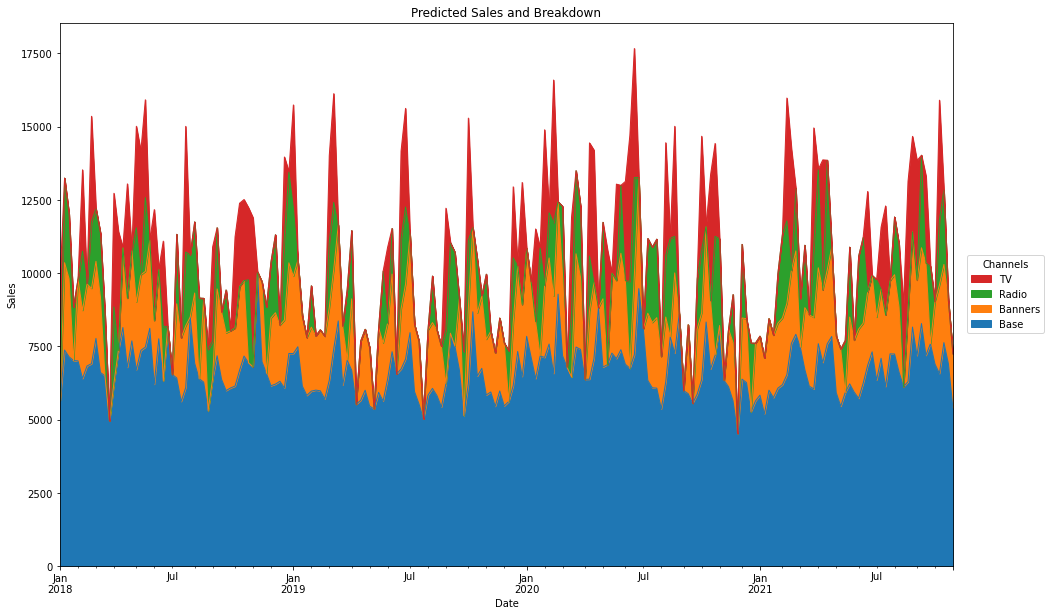

In [24]:
ax = (adj_contributions[['Base', 'Banners', 'Radio', 'TV']]
      .plot.area(
          figsize=(16, 10),
          linewidth=1,
          title='Predicted Sales and Breakdown',
          ylabel='Sales',
          xlabel='Date')
     )
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles[::-1], labels[::-1],
    title='Channels', loc="center left",
    bbox_to_anchor=(1.01, 0.5)
)

Computing the Return on Investment (ROI)
We can now determine which channel was the best in terms of ROI, a number that measures the efficiency. The formula is simple:
channel_ROI = Sales from the channel / channel spendings
With the code snippets from above, we already have all the data we need for the computation. You can calculate the TV ROI as follows:

In [25]:
sales_from_tv = adj_contributions['TV'].sum()
spendings_on_tv = data['TV'].sum()
tv_roi = sales_from_tv / spendings_on_tv
# tv_roi is around 0.36

In [26]:
tv_roi

0.3602450071355312